# Matplotlib

## Устанавливаем библиотеку

Для установки библиотеки `matplotlib` необходимо использовать команду:
```
pip install matplotlib
```

## Проверяем доступность библиотеки

In [1]:
try:
    import matplotlib
    print("Версия библиотеки:", matplotlib.__version__)
except:
    print("Библиотека matplotlib недоступна.")
    print("Установите ее при помощи команды 'pip install matplotlib'")

Версия библиотеки: 3.7.2


## Особенности библиотеки matplotlib

### Измерение размеров в дюймах

Некоторые параметры измеряются в дюймах, и для работы с сантиметрами создадим функцию преобразования сантиметров в дюймы:

In [2]:
def cm_to_inch(cm: int|float) -> float:
    return cm/2.54

## Установка глобальных констант

Установим переменную для управления качеством графиков:

In [3]:
DPI = 100

Установим размер текста

In [4]:
FONT_SIZE = 14

## Matplotlib на простых примерах

Для начала практики построим параболу.

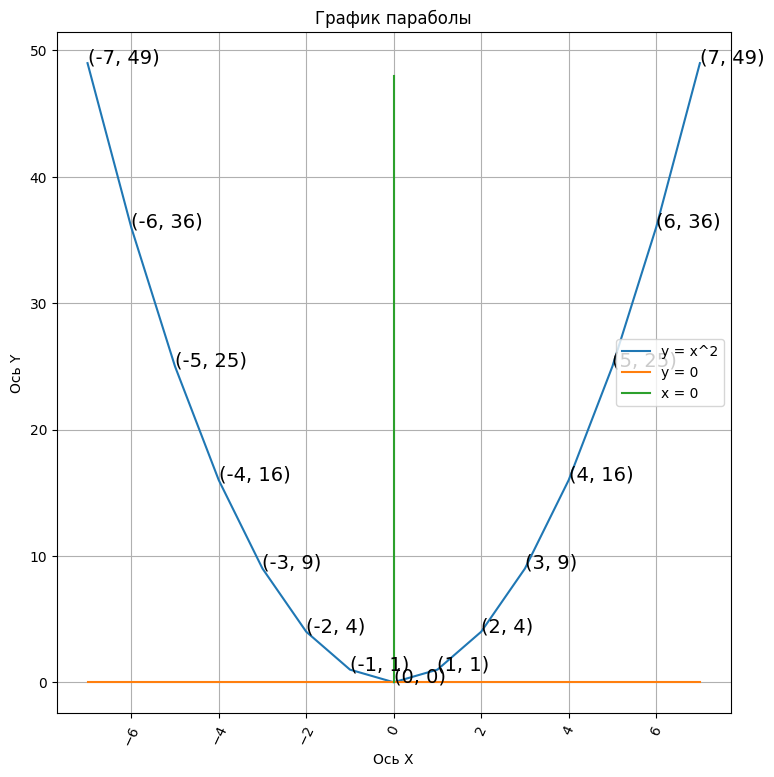

In [5]:
import matplotlib.pyplot as plt

# Устанавливаем размеры графика (x, y) и dpi графика
plt.figure(figsize=(
    cm_to_inch(20),
    cm_to_inch(20)),
    dpi=DPI)
# Создаем подпись к графику
# label - название графика
# fontdict - словарь с настройками отображения текста
plt.title(label="График параболы",
          fontdict={
              "horizontalalignment": "center",
          })
# Настраиваем подпись для осей X и Y
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
# Для лучшего отображения подписи по оси X 
# поворачиваем надпись на угол присвоенный rotation
plt.xticks(rotation=65)
# Включаем отображение сетки
plt.grid()
# Указываем количество значений, используемых на графике
number_of_values = 15
# Сдвиг оси относительно края графика
# Если сдвига нет, график будет строится только в положительной области x
axis_shift = int(number_of_values/2)

# Задаем функцию для параболы
y_of_x = lambda x: x**2
# Указываем значения x
x = [i for i in range(0-axis_shift, number_of_values-axis_shift)]
# Вычисляем значения y
y = [y_of_x(x_i) for x_i in x]

# Задаем значения для графика: сначала указываем массив x, затем массив y
# после присваиваем label формулу для легенды графика
plt.plot(x, 
         y,
         label=r'y = x^2')
# Проводим аналогичные действия для отрисовки оси абсцисс (y=0)
plt.plot(x, 
         [0 for i in range(number_of_values)],
         label=r'y = 0')
# Проводим аналогичные действия для отрисовки оси ординат (x=0)
plt.plot(
        [0 for i in range(y[-1])], 
        [i for i in range(y[-1])],
        label=r'x = 0')

# Добавляем легенду на график
plt.legend()

# Подготавливаем данные для точек графика
xy = zip(x, y)
# Добавляем указание точек (текст) на график
for x_item, y_item in xy:
    plt.text(x_item, y_item, f"({x_item}, {y_item})", fontsize=FONT_SIZE)

# Устанавливаем автоматические размеры, чтобы график полностью помещался в окно
plt.tight_layout()

# Сохраняем изображение
plt.savefig('media/matplotlib/first_graph.jpg')
# Отображаем построенный график
plt.show()

Теперь попробуем построить график параболы с желтой и пунктирной линией

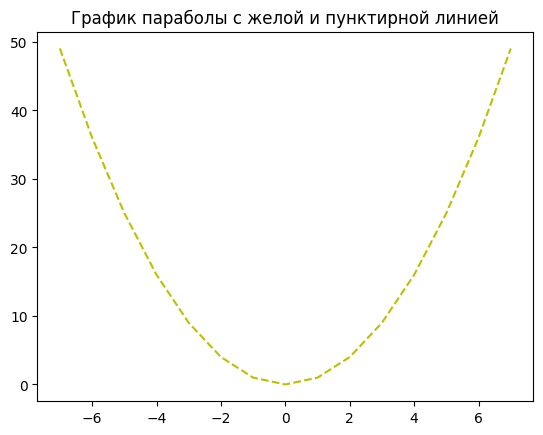

In [6]:
plt.title("График параболы с желой и пунктирной линией")
plt.plot(x,y, "y--")
# Сохраняем изображение
plt.savefig('media/matplotlib/second_graph.jpg')
# Отображаем построенный график
plt.show()

## Несколько графиков на одном поле

Построим два графика $y_1=x$ и $y_2=x^2$

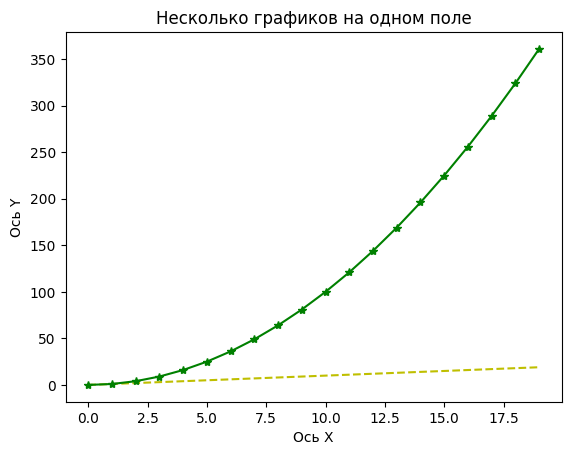

In [7]:
x = [i for i in range(20)]
y1 = [x_item for x_item in x]
y2 = [x_item**2 for x_item in x]

plt.title("Несколько графиков на одном поле")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")

# Задаем графики
plt.plot(x, y1, "y--", x, y2, "g-*")

# Сохраняем изображение
plt.savefig('media/matplotlib/multiple_graphs.jpg')
# Отображаем построенный график
plt.show()

## Несколько раздельных графиков

Теперь попробуем задать те же функции, но на разных графиках

Для этого будем использовать обертку `pyplot.subplot` которая принимает следующие параметры:
* nrows - количество строк;
* ncols - количество столбцов;
* index - индек. Считается сверху вниз, слева направо. Также может быть кортежем.

Также параметры можно передать как **одно число**, указав их без запятых.

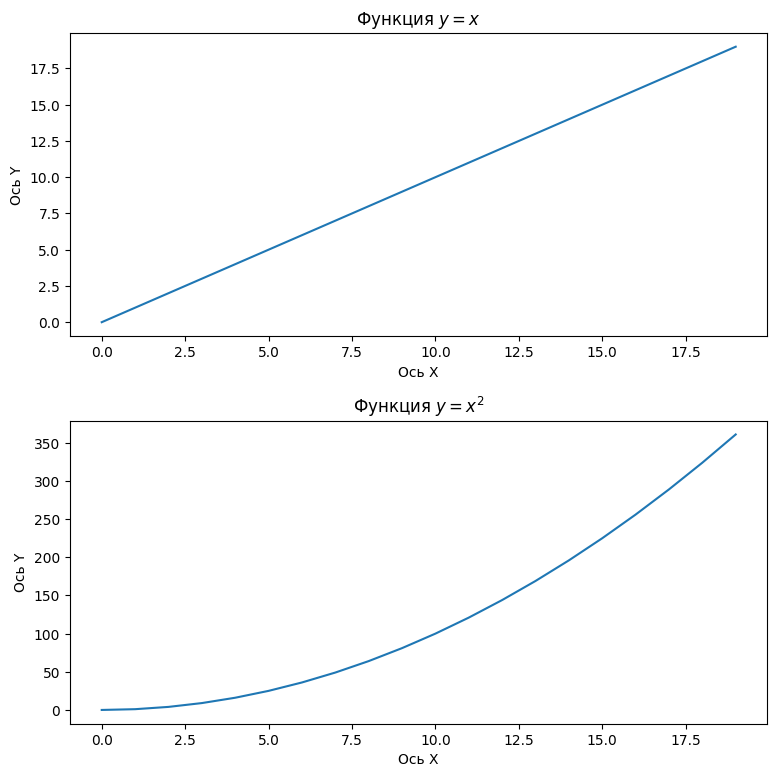

In [8]:
plt.figure(figsize=(
    cm_to_inch(20),
    cm_to_inch(20)
),
dpi=DPI)

plt.subplot(2,1,1)
plt.title(r'Функция $y=x$')
plt.plot(x, y1)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")

plt.subplot(2,1,2)
plt.title(r'Функция $y=x^2$')
plt.plot(x, y2)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")

plt.tight_layout()

# Сохраняем изображение
plt.savefig('media/matplotlib/several_multiple_graphs.jpg')
# Отображаем построенный график
plt.show()

## Построение диаграммы для категориальных данных

Создадим диаграмму количества продуктов, имеющихся в наличии в магазине.

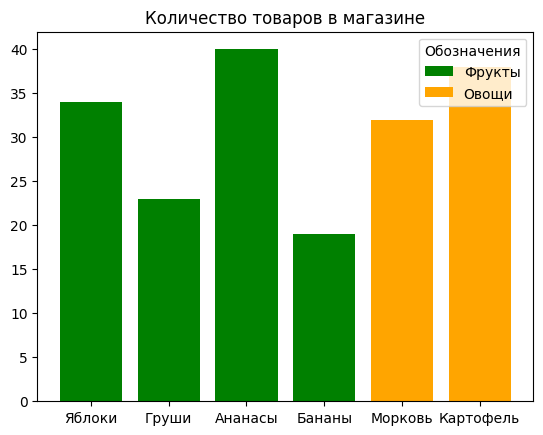

In [31]:
# Полученные данные о товарах
data={
    "Фрукты": {
        "Яблоки": 34,
        "Груши": 23,
        "Ананасы": 40,
        "Бананы": 19,
    },
    "Овощи": {
        "Морковь": 32,
        "Картофель": 38,
    }
    }

# Определяем цветовую палитру
colors = {
    "Фрукты": "green",
    "Овощи": "orange",
}

# Очищаем переменные
x = []
y = []
bar_labels = []
bar_colors = []

# Для каждого типа продукта и его значения
for type, values in data.items():
    # Необходимо для проставления символа `_` в дублирующихся записях
    first_value_for_legend = True
    # Для каждой записи
    for key, value in values.items():
        # Если цвет найден среди палитры
        if colors.get(type):
            bar_colors.append(colors.get(type))
        else:
            # По умолчанию устанавливается черный цвет
            bar_colors.append("black")
        # Первое значение типа в подписи для легенды проставляется без `_`
        if first_value_for_legend:
            bar_labels.append(type)
        else:
            bar_labels.append(f"_{type}")\
        # Добавляем значения для оси X
        x.append(key)
        # Добавляем значения для оси Y
        y.append(value)
        first_value_for_legend = False

plt.title("Количество товаров в магазине")

# Создаем диаграмму
plt.bar(x,y, label=bar_labels, color=bar_colors)

# Добавляем на диаграмму легенду
plt.legend(title="Обозначения")

# Сохраняем изображение
plt.savefig('media/matplotlib/first_bar_chart.jpg')
# Отображаем построенный график
plt.show()